# Flexible batch_size & Faster SSD Loading

This example assumes you've read `advanced.ipynb`, and covers:

  - How batch_size can be a multiple of batch_size on file
  - Faster SSD loading via flexible batch size

In [1]:
import deeptrain
deeptrain.util.misc.append_examples_dir_to_sys_path()

from utils import make_autoencoder, init_session, AE_CONFIGS as C

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality

DeepTrain can use `batch_size` an integral multiple of one on file, by splitting up into smaller batches or combining 
into larger. 

If a file stores 128 samples, we can split it to x2 64-sample batches, or combine two files into
x1 256-sample batch.

In [3]:
C['traingen']['epochs'] = 1

### User batch_size=64, file batch_size=128

In [4]:
C['datagen'    ]['batch_size'] = 64
C['val_datagen']['batch_size'] = 64
C['model']['batch_shape'] = (64, 28, 28, 1)

In [5]:
tg = init_session(C, make_autoencoder)

Discovered 48 files with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample


Fitting set 1-a... Loss = 0.324289 
Fitting set 1-b... Loss = 0.318535 
Fitting set 2-a... Loss = 0.312938 
Fitting set 2-b... Loss = 0.308814 
Fitting set 3-a... Loss = 0.305074 
Fitting set 3-b... Loss = 0.301463 
Fitting set 4-a... Loss = 0.298007 
Fitting set 4-b... Loss = 0.294440 
Fitting set 5-a... Loss = 0.290893 
Fitting set 5-b... Loss = 0.287475 
Fitting set 6-a... Loss = 0.284070 
Fitting set 6-b... Loss = 0.280488 
Fitting set 7-a... Loss = 0.276782 
Fitting set 7-b... Loss = 0.273143 
Fitting set 8-a... Loss = 0.269380 
Fitting set 8-b... Loss = 0.265857 
Fitting set 9-a... Loss = 0.262398 
Fitting set 9-b... Loss = 0.258981 
Fitting set 10-a... Loss = 0.255540 
Fitting set 10-b... Loss = 0.252130 
Fitting set 11-a... Loss = 0.248852 
Fitting set 11-b... Loss = 0.245501 
Fitting set 12-a... Loss = 0.242162 
Fitting set 12-b... Loss = 0.238978 
Fitting set 13-a... Loss = 0.235816 
Fitting set 13-b... Loss = 0.232706 
Fitting set 14-a... Loss = 0.229668 
Fitting set 14-b..

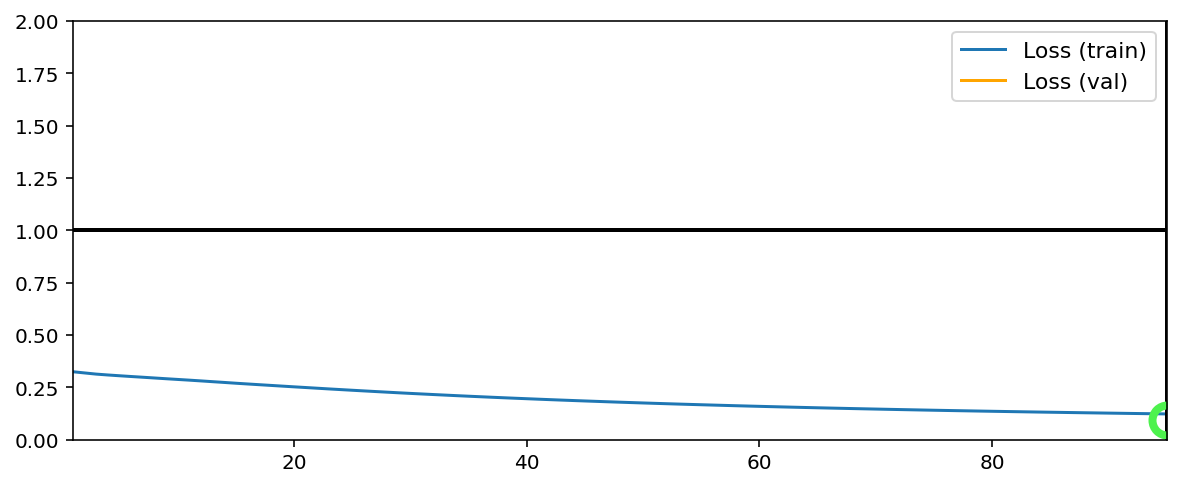

Training has concluded.


In [6]:
tg.train()

### User batch_size=256, file batch_size=128

In [7]:
C['datagen'    ]['batch_size'] = 256
C['val_datagen']['batch_size'] = 256
C['model']['batch_shape'] = (256, 28, 28, 1)

In [8]:
tg = init_session(C, make_autoencoder)

Discovered 48 files with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample


Fitting set 1+2... Loss = 0.227430 
Fitting set 3+4... Loss = 0.223044 
Fitting set 5+6... Loss = 0.219097 
Fitting set 7+8... Loss = 0.215521 
Fitting set 9+10... Loss = 0.212137 
Fitting set 11+12... Loss = 0.209203 
Fitting set 13+14... Loss = 0.206201 
Fitting set 15+16... Loss = 0.203037 
Fitting set 17+18... Loss = 0.199963 
Fitting set 19+20... Loss = 0.196950 
Fitting set 21+22... Loss = 0.193953 
Fitting set 23+24... Loss = 0.190855 
Fitting set 25+26... Loss = 0.187864 
Fitting set 27+28... Loss = 0.184951 
Fitting set 29+30... Loss = 0.182049 
Fitting set 31+32... Loss = 0.179196 
Fitting set 33+34... Loss = 0.176440 
Fitting set 35+36... Loss = 0.173741 
Fitting set 37+38... Loss = 0.171157 
Fitting set 39+40... Loss = 0.168680 
Fitting set 41+42... Loss = 0.166255 
Fitting set 43+44... Loss = 0.163880 
Fitting set 45+46... Loss = 0.161516 
Fitting set 47+48... Loss = 0.159251 
Data set_nums shuffled


_____________________
 EPOCH 1 -- COMPLETE 



Validating...
Validating

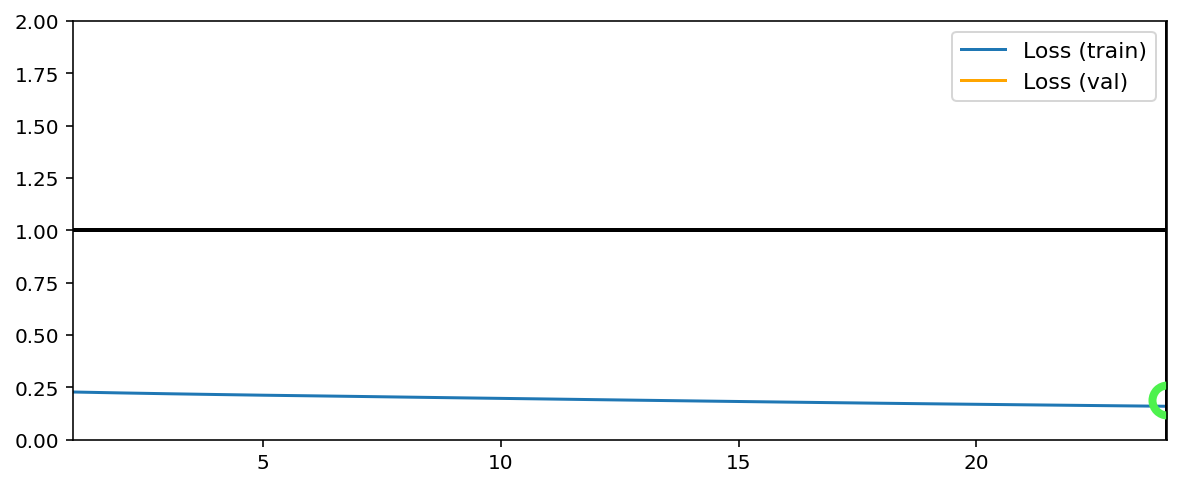

Training has concluded.


In [9]:
tg.train()

We can see the difference in the two settings through sets logging:

  - `batch_size=64`: a `set_num` is split into `'a'` and `'b'`
  - `batch_size=256`: `set_num1 + set_num2`, combining two files

### Faster SSD Loading

 - Save larger `batch_size` on disk (e.g. 512) than is used (e.g. 32). 
 - Larger files much better utilize an SSD's read speed via parallelism.
 - `batch_size` on file can be as large as RAM permits.